The Amazon Reviews dataset was used to perform sentiment analysis on customer reviews. As a result of this analysis, a model was created to predict positive or negative sentiment.

Import Library

In [51]:
!pip install nltk
!pip install textblob
!pip install wordcloud

In [52]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from wordcloud import WordCloud

In [53]:
filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [54]:
df = pd.read_csv("amazon_reviews.csv", sep=",")

In [55]:
df.head()

reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.     4.00   
1  Purchased this for my device, it worked as adv...     5.00   
2  it works as expected. I should have sprung for...     4.00   
3  This think has worked out great.Had a diff. br...     5.00   
4  Bought it with Retail Packaging, arrived legit...     5.00   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to really say....      1356220800  2012-12-23   
3  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21   
4                        best deal around      1373673600  2013-07-13   

   day_diff  helpful_yes  total_vote  
0       138            0           0  
1       409            0           0  
2       715            0           0  
3       382            0           0  
4       513            0           0

Normalizing Case Folding

In [56]:
df['reviewText']= df["reviewText"].str.lower()

Punctuations

In [61]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)

In [62]:
print(df['reviewText'])

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
5       its mini storage  it doesnt do anything else a...
6       i have it in my phone and it never skips a bea...
7       its hard to believe how affordable digital has...
8       works in a htc rezound  was running short of s...
9       in my galaxy s4 super fast card and am totally...
10      i like this sd card because it can take music ...
11      it works but file writes are a bit slower than...
12            the name of itself speaks out go sandisk go
13      solid sdhc card that is fast at reading and wr...
14      heard that the cards write speed is insufficie...
15      i bought this to use with my go pro hero 3 bla...
16      got this because i had a 2 gb one that filled ...
17      class 

Numbers

In [63]:
df['reviewText'] = df['reviewText'].str.replace('\d','', regex=True)

In [64]:
print(df['reviewText'])

0                                               no issues
1       purchased this for my device it worked as adve...
2       it works as expected i should have sprung for ...
3       this think has worked out greathad a diff bran...
4       bought it with retail packaging arrived legit ...
5       its mini storage  it doesnt do anything else a...
6       i have it in my phone and it never skips a bea...
7       its hard to believe how affordable digital has...
8       works in a htc rezound  was running short of s...
9       in my galaxy s super fast card and am totally ...
10      i like this sd card because it can take music ...
11      it works but file writes are a bit slower than...
12            the name of itself speaks out go sandisk go
13      solid sdhc card that is fast at reading and wr...
14      heard that the cards write speed is insufficie...
15      i bought this to use with my go pro hero  blac...
16      got this because i had a  gb one that filled u...
17      class 

Stop Words (Words without meaning that are commonly used in the language)


In [65]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
sw = stopwords.words('english')

In [67]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [68]:
print(df['reviewText'])

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected sprung higher capacity think ma...
3       think worked greathad diff bran gb card went s...
4       bought retail packaging arrived legit orange e...
5       mini storage doesnt anything else supposed pur...
6       phone never skips beat file transfers speedy c...
7       hard believe affordable digital become gb devi...
8       works htc rezound running short space gb sandi...
9       galaxy super fast card totally happy happy sti...
10      like sd card take music video downloads person...
11      works file writes bit slower expected usb read...
12                              name speaks go sandisk go
13      solid sdhc card fast reading writing fast reco...
14      heard cards write speed insufficient however u...
15      bought use go pro hero black edition requires ...
16      got gb one filled kept getting insufficient di...
17      class 

Rare Words

In [69]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

In [73]:
temp_df

card                                                                                                                        4603
gb                                                                                                                          1725
phone                                                                                                                       1685
works                                                                                                                       1559
great                                                                                                                       1445
memory                                                                                                                      1361
sandisk                                                                                                                     1286
sd                                                                                                                          1199
use                                                                                                                         1115
one                                                                                                                         1072
galaxy                                                                                                                      1023
cards                                                                                                                        934
fast                                                                                                                         907
good                                                                                                                         891
price                                                                                                                        842
bought                                                                                                                       832
samsung                                                                                                                      828
storage                                                                                                                      756
would                                                                                                                        692
well                                                                                                                         677
speed                                                                                                                        643
tablet                                                                                                                       643
class                                                                                                                        625
music                                                                                                                        602
using                                                                                                                        593
got                                                                                                                          563
get                                                                                                                          548
product                                                                                                                      529
micro                                                                                                                        528
like                                                                                                                         520
camera                                                                                                                       520
n

In [74]:
drops = temp_df[temp_df <= 1]

In [71]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
print(df['reviewText'])

Tokenization

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2113c8aeb34ce74fa207b2f5271ae9b176df4d5ef7b243aa709ea8d5367c4474
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [126]:
from langdetect import detect
from textblob import TextBlob

In [39]:
df['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [work, expected, higher, capacity, think, made...
3    [think, worked, 64gb, card, went, south, 3, on...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

In [128]:

df['n_tokens'] = df['reviewText'].apply(lambda x: len(TextBlob(x).words))


In [127]:
df['dil'] = df['reviewText'].apply(lambda x: detect(x) if x.strip() else 'unknown')

Lemmatization

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from textblob import Word

In [42]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

Calculation of Term Frequencies

In [75]:
tf=(df['reviewText'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index())

In [76]:
tf.columns=['words','tf']

In [77]:
tf.sort_values(by='tf',ascending=False)

words      tf
27                 card 4603.00
39                   gb 1725.00
7                 phone 1685.00
14                works 1559.00
100               great 1445.00
8                memory 1361.00
73              sandisk 1286.00
46                   sd 1199.00
206                 use 1115.00
36                  one 1072.00
137              galaxy 1023.00
55                cards  934.00
135                fast  907.00
97                 good  891.00
50                price  842.00
41               bought  832.00
313             samsung  828.00
67              storage  756.00
103               would  692.00
33                 well  677.00
75               tablet  643.00
162               speed  643.00
163               class  625.00
117               music  602.00
259               using  593.00
233                 got  563.00
48                  get  548.00
95              product  529.00
308               micro  528.00
455              camera  520.00
61                 like  520.00
26                 note  511.00
153             adapter  497.00
366                work  485.00
375            problems  462.00
3                worked  460.00
132               space  458.00
310                 buy  455.00
0                issues  450.00
200                used  450.00
31                  ive  433.00
148               video  425.00
465                 new  423.00
475                time  418.00
91                files  405.00
6                  much  403.00
452                need  400.00
279                data  400.00
226                dont  394.00
158           recommend  392.00
335             microsd  390.00
204             problem  386.00
177                read  385.00
215                 far  383.00
361                fine  373.00
224            pictures  369.00
376              format  360.00
5                 never  358.00
325                 put  353.00
230                 say  352.00
1             purchased  344.00
408              amazon  344.00
1031              gopro  339.00
165            transfer  339.00
302                  im  337.00
307                also  333.00
601                even  331.00
2                device  330.00
185                  go  320.00
343              really  318.00
178               write  315.00
140               still  295.00
168              videos  290.00
613              movies  284.00
315              speeds  281.00
11                  lot  275.00
30               months  271.00
54              working  270.00
458             android  264.00
17             capacity  259.00
566             without  257.00
352             quality  257.00
494             devices  254.00
101               brand  252.00
413            computer  252.00
506               could  249.00
712           perfectly  249.00
500              photos  248.00
9                 since  243.00
478              little  242.00
172                 mbs  241.00
271               store  239.00
245               ultra  238.00
331              always  237.00
147                take  232.00
538               first  232.00
180              faster  232.00
258              phones  224.00
175                cant  221.00
396                back  220.00
309             another  217.00
244                  hd  212.00
116               didnt  212.00
372               right  212.00
134                came  209.00
51                 best  208.00
380                 two  208.00
205              needed  203.00
154              enough  201.00
344                size  200.00
528                sure  199.00
689               seems  198.00
691                able  198.00
136               happy  196.00
40             reliable  195.00
84                extra  192.00
451                know  191.00
655                love  189.00
69                  pro  188.00
252                easy  181.00
211               comes  180.00
701             perfect  179.00
220                hero  179.00
463               tried  179.00
213               

Barplot

<Axes: xlabel='words'>

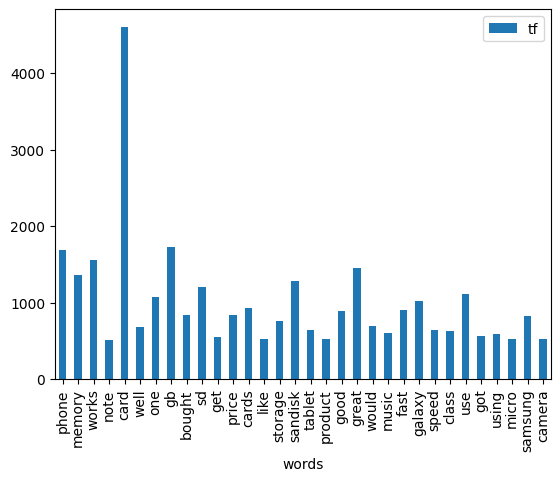

In [79]:
tf[tf['tf']>500].plot.bar(x='words',y='tf')

Wordcloud

In [80]:
text = " ".join(i for i in df.reviewText)

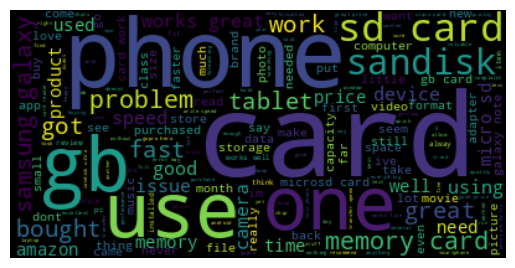

In [81]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Sentiment Analysis

In [82]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [83]:
sia = SentimentIntensityAnalyzer()

Positive Mood State

In [84]:
sia.polarity_scores("The film was awasome")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Negative Mood State

In [85]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [89]:
df['reviewText'][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
3    {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...
4    {'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co...
7    {'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [90]:
df['reviewText'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.87
7   0.82
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [91]:
df['polarity_scores'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)["compound"])

Future Engineering

In [93]:
df["reviewText"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [98]:
df["sentiment_label"] = df["reviewText"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

In [99]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3922
neg     993
Name: count, dtype: int64

In [101]:
df.groupby("sentiment_label").agg({"overall":"mean"})

overall
sentiment_label         
neg                 4.11
pos                 4.71

In [102]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [103]:
y = df["sentiment_label"]
X = df["reviewText"]

Count Vectors (Extracting Frequencies of Words)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]


array(['access', 'accessed', 'accesses', 'accessible', 'accessing'],
      dtype=object)

In [109]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Model

In [116]:
log_model = LogisticRegression().fit(X_count, y)

In [117]:
cross_val_score(log_model, X_count, y, scoring="accuracy", cv=5).mean()

0.8626653102746694

Prediction

In [118]:
new_rewiew = pd.Series("this product is great")

In [119]:
new_rewiew = vectorizer.fit(X).transform(new_rewiew)

In [120]:
log_model.predict(new_rewiew)

array([1])

The model achieved an impressive accuracy rate of 86%, demonstrating its strong ability to accurately predict sentiment in Amazon customer reviews. This high level of performance highlights the model's effectiveness and reliability in real-world applications, showcasing the value it brings to sentiment analysis tasks.